# **Mathematical Tools for Big Data - Assignment 3**

### **Students :**
- **Alexandra de Carvalho** (93346)
- **Diogo Pedrosa** (xxxxx)
- **Roshan Poudel** (109806)

## **Common Steps**

## Reading and General data analysis

In [1]:
import pandas as pd
import numpy as np
import random

random.seed(2022)
# reading data
data = pd.read_csv("data/cash-crops-nepal.csv")
# visualize some data
data.iloc[:5,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:5,:]

,Area,Production,Yield
25,81570,640910,7857
46,7300,5380,737
64,23010,558340,24265
80,59477,2247990,37796
88,13554,17624,1300


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:5,:]

,Area,Production,Yield
25,0.428349,0.269732,0.195365
46,0.038334,0.002264,0.018326
64,0.120832,0.234981,0.603352
80,0.312332,0.946083,0.939802
88,0.071176,0.007417,0.032325


## Loading SOM utils

In [6]:
from scripts.som_utils import neighborhood_preservation_trustworthiness
from scripts.som_utils import som_train_predict
from scripts.som_utils import visualize_som

## Base SOM (SOM1)

SOM training epoches 2
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 4
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 6
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 8
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 10
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 12
neighborhood radius  1.5518455739153594
learning rate  0.005488116360940264
-------------------------------------
SOM training epoches 14
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 16
neighborhood ra

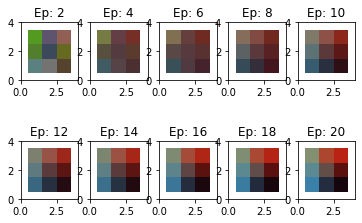

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
25,1988/89,2045/46,POTATO,81570,640910,7857,0.428349,0.269732,0.195365,"[[0.388651091066612, 0.30249209625975726, 0.27...","[1, 1]"
46,1988/89,2045/46,TOBACCO,7300,5380,737,0.038334,0.002264,0.018326,"[[0.083069684832033, 0.019810485744066075, 0.0...","[2, 0]"
64,1985/86,2042/43,SUGARCANE,23010,558340,24265,0.120832,0.234981,0.603352,"[[0.2283318948327799, 0.5121302198425589, 0.67...","[0, 0]"
80,2001/2002,2058/59,SUGARCANE,59477,2247990,37796,0.312332,0.946083,0.939802,"[[0.2283318948327799, 0.5121302198425589, 0.67...","[0, 0]"
88,1988/89,2045/46,JUTE,13554,17624,1300,0.071176,0.007417,0.032325,"[[0.083069684832033, 0.019810485744066075, 0.0...","[2, 0]"


In [7]:
from scripts.our_som1 import SOM as SOM_1_base
# som = SOM(x_size, y_size, num_features)
som_1 = SOM_1_base(3,3,3)
joined_df, clustered_df = som_train_predict(som_1, trunc_data, agri_data, num_epochs=20, init_learning_rate=0.01)
joined_df.iloc[0:5]

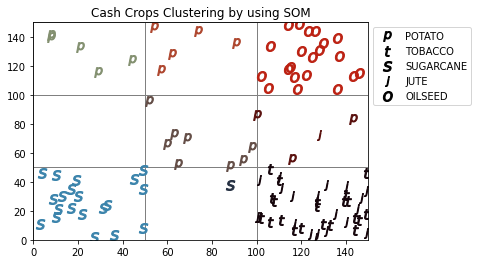

In [8]:
visualize_som(som_1, joined_df)

In [9]:
trunc_data.head()

,Area,Production,Yield
25,0.428349,0.269732,0.195365
46,0.038334,0.002264,0.018326
64,0.120832,0.234981,0.603352
80,0.312332,0.946083,0.939802
88,0.071176,0.007417,0.032325


In [10]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd.head()

,0,1,2
25,0.388651,0.302492,0.274863
46,0.083070,0.019810,0.044247
64,0.228332,0.512130,0.671600
80,0.228332,0.512130,0.671600
88,0.083070,0.019810,0.044247


<br /> <br />

## **Q1:** What is the numeric criteria that you may use to determine if a change in the algorithm produces improvements?

Throughout this assignment, we will be exploring different changes to the proposed algorithm, and their impact in results. Thus, we are in need of a numerical criteria that will allow us to measure results. For this reason, we are going to use the metrics of neighbourhood preservation and trustworthiness. These measure how the projection preserves the neighborhoods present in the input space by ranking the k-nearest neighbors of each sample before and after projection. The implementation of this criteria is in function `neighborhood_preservation_trustworthiness` inside `soms/som_utils.py` file.

In [11]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.7812297734627831, 0.8759402051467877)

<br /> <br />

## **Q2:** Write the version SOM1A, where you change the curve of the learning factor. Did you achieve improvements?

The learning rate controls the size of weight vector. Therefore, chosing its decay function is important. There are many learning rate functions, like the power series implemented in `scripts/our_som1.py`. We found that a linear learning rate, implemented in `scripts/our_som1_A.py`, improves the algorithm performance, as shown by comparing the measurement function results.

SOM training epoches 2
neighborhood radius  2.6878753795222865
learning rate  0.005
-------------------------------------
SOM training epoches 4
neighborhood radius  2.4082246852806923
learning rate  0.0025
-------------------------------------
SOM training epoches 6
neighborhood radius  2.157669279974593
learning rate  0.0016666666666666666
-------------------------------------
SOM training epoches 8
neighborhood radius  1.9331820449317627
learning rate  0.00125
-------------------------------------
SOM training epoches 10
neighborhood radius  1.7320508075688772
learning rate  0.001
-------------------------------------
SOM training epoches 12
neighborhood radius  1.5518455739153594
learning rate  0.0008333333333333333
-------------------------------------
SOM training epoches 14
neighborhood radius  1.3903891703159093
learning rate  0.0007142857142857143
-------------------------------------
SOM training epoches 16
neighborhood radius  1.2457309396155172
learning rate  0.000625
-----

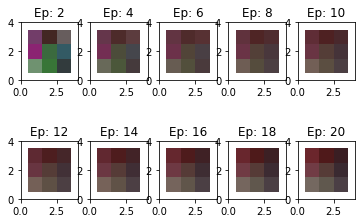

In [12]:
from scripts.our_som1_A import SOM as SOM_1_A
# som = SOM(x_size, y_size, num_features)
som_1_A = SOM_1_A(3,3,3)
joined_df, clustered_df = som_train_predict(som_1_A, trunc_data, agri_data, num_epochs=20, init_learning_rate=0.01)
#joined_df.iloc[0:5]

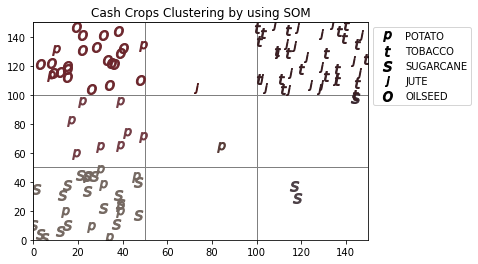

In [13]:
visualize_som(som_1_A, joined_df)

In [14]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)

In [15]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.765880721220527, 0.8082880841238724)

<br /> <br />

## **Q3:** Write the version SOM1B, where you change the curve of the deviation. Did you achieve improvements?

<br /> <br />

## **Q4:** Write the version SOM1C, where you change the normal distribution to other distribution of your choice. Did you achieve improvements?